In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

In [3]:
import chardet
with open("D:/abhinav/data/sms_spam/spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7272080023536335, 'language': ''}

In [4]:
df=pd.read_csv("D:abhinav/data/sms_spam/spam.csv",encoding='Windows-1252')

In [5]:
df.sample

<bound method NDFrame.sample of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

### 1.Data Cleaning

In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [10]:
df.duplicated().sum()

403

In [11]:
df=df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

### 2.EDA

In [13]:
df['target'].describe()

count    5169.000000
mean        0.126330
std         0.332253
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: target, dtype: float64

In [14]:
# mean is close to zero so ham is more than spam

([<matplotlib.patches.Wedge at 0x2051e85fe90>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

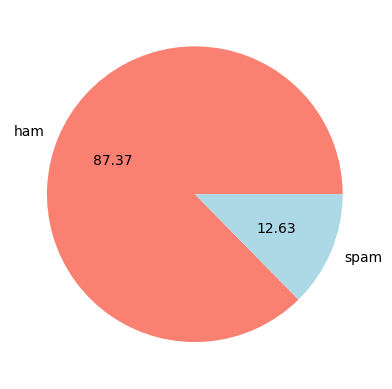

In [15]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],colors=['salmon','lightblue'],autopct="%0.2f")

In [16]:
# data is inbalanced

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters']=df['text'].apply(len)

C:\Users\abhin\AppData\Local\Temp\ipykernel_29928\399031894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [19]:
df.columns

Index(['target', 'text', 'num_characters'], dtype='object')

In [20]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  #each msg is split into words and the output is a list

C:\Users\abhin\AppData\Local\Temp\ipykernel_29928\4053514308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  #each msg is split into words and the output is a list


In [21]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\abhin\AppData\Local\Temp\ipykernel_29928\754723001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [22]:
df[['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,18.455794
std,58.236293,1.448541,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [23]:
df[df['target']==0][['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [24]:
df[df['target']==1][['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


In [25]:
import seaborn as sns

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

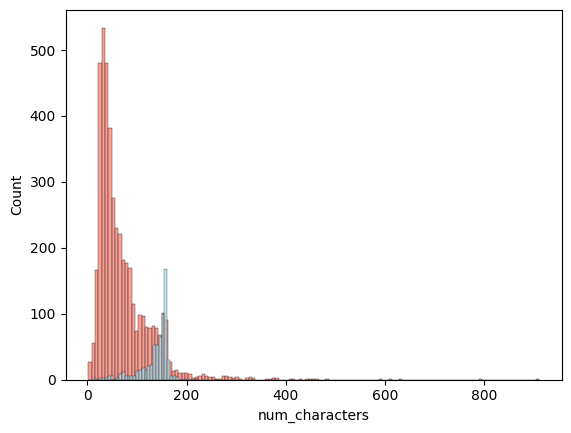

In [26]:
sns.histplot(df[df['target']==0]['num_characters'],color='salmon')
sns.histplot(df[df['target']==1]['num_characters'],color='lightblue')

In [27]:
#spam msgs consists of more words,characters

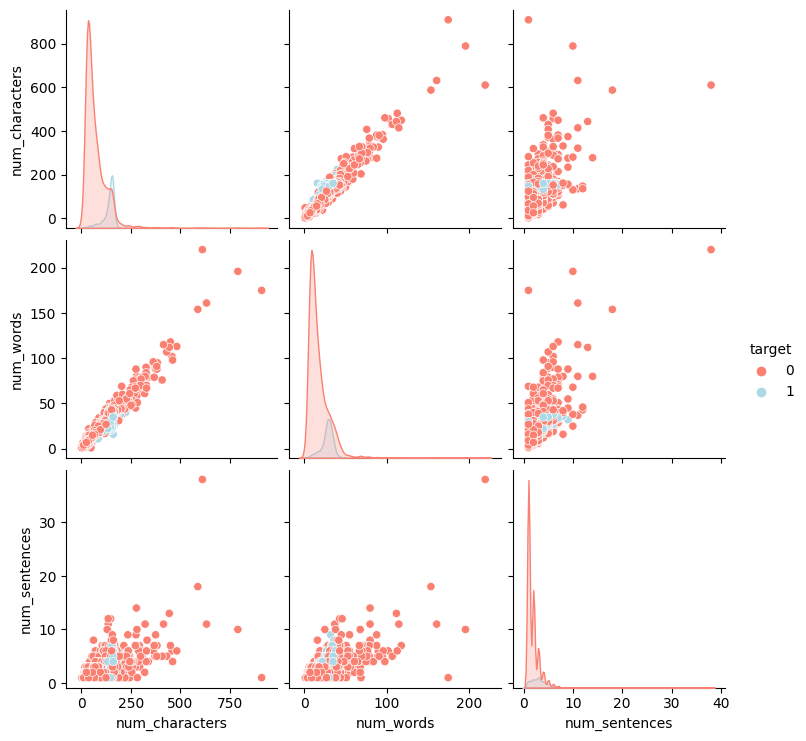

In [28]:
sns.pairplot(df,hue='target',palette=['salmon','lightblue'])

C:\Users\abhin\AppData\Local\Temp\ipykernel_29928\1755212933.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")


<AxesSubplot: >

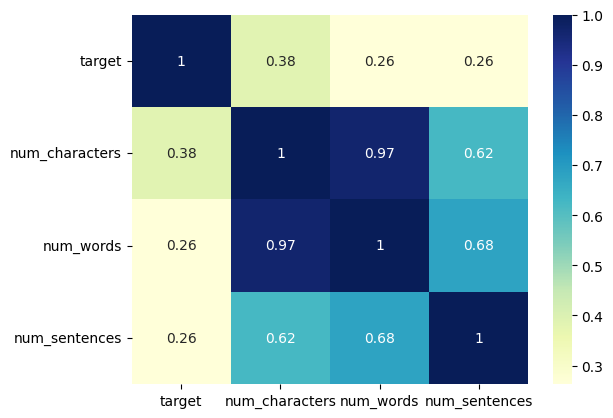

In [29]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

### 3.Data Processing

In [30]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
ps=PorterStemmer()
import string
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y) #return as a string
    
        

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df['transformed_text']=df['text'].apply(transform_text)


C:\Users\abhin\AppData\Local\Temp\ipykernel_29928\1118262064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [32]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [33]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

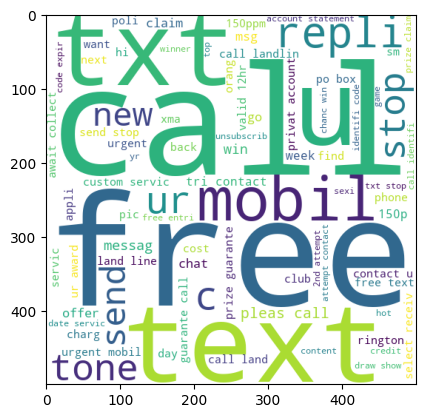

In [34]:
plt.imshow(spam_wc)

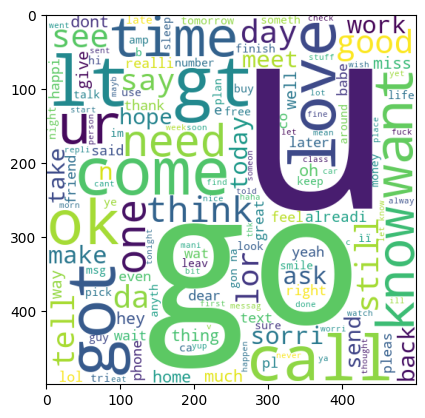

In [35]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [36]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

### 4.Model

In [38]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [42]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [43]:
X.shape

(5169, 6708)

In [44]:
y=df['target'].values

In [45]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
from sklearn.model_selection import train_test_split


In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [48]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [49]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()



In [50]:
%%time
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8607350096711799
[[778 121]
 [ 23 112]]
0.48068669527896996
CPU times: total: 266 ms
Wall time: 378 ms


In [51]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9526112185686654
[[899   0]
 [ 49  86]]
1.0


In [52]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9535783365570599
[[894   5]
 [ 43  92]]
0.9484536082474226


In [53]:
#mnb with tfidf is chosen as it has precision score=1

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [57]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [58]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [59]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9661508704061895
Precision -  0.9545454545454546
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9526112185686654
Precision -  1.0
For  DT
Accuracy -  0.9158607350096711
Precision -  0.7790697674418605
For  LR
Accuracy -  0.9400386847195358
Precision -  0.8842105263157894
For  RF
Accuracy -  0.9632495164410058
Precision -  1.0
For  AdaBoost
Accuracy -  0.9555125725338491
Precision -  0.9238095238095239
For  BgC
Accuracy -  0.9516441005802708
Precision -  0.8632478632478633
For  ETC
Accuracy -  0.9700193423597679
Precision -  1.0
For  GBDT
Accuracy -  0.9342359767891683
Precision -  0.8764044943820225
For  xgb
Accuracy -  0.9584139264990329
Precision -  0.9181818181818182


In [63]:
for i in range(500,6000,500):
    tfidf=TfidfVectorizer(max_features=i)
    X=tfidf.fit_transform(df['transformed_text']).toarray()
    y=df['target'].values
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
    mnb.fit(X_train,y_train)
    y_pred2=mnb.predict(X_test)
    print(i)
    print(accuracy_score(y_test,y_pred2)) 
    print(precision_score(y_test,y_pred2))

500
0.9671179883945842
0.954954954954955
1000
0.9642166344294004
0.9537037037037037
1500
0.9690522243713733
0.9813084112149533
2000
0.9690522243713733
1.0
2500
0.9680851063829787
1.0
3000
0.9613152804642167
1.0
3500
0.9613152804642167
1.0
4000
0.960348162475822
1.0
4500
0.9584139264990329
1.0
5000
0.9564796905222437
1.0
5500
0.9545454545454546
1.0


In [64]:
#best result is at 3000 max_features

In [66]:
for i in range(500,6000,500):
    tfidf=TfidfVectorizer(max_features=i)
    X=tfidf.fit_transform(df['transformed_text']).toarray()
    y=df['target'].values
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
    etc.fit(X_train,y_train)
    y_pred2=etc.predict(X_test)
    print(i)
    print(accuracy_score(y_test,y_pred2)) 
    print(precision_score(y_test,y_pred2))

500
0.9729206963249516
0.9495798319327731
1000
0.971953578336557
0.9649122807017544
1500
0.9738878143133463
0.9736842105263158
2000
0.9748549323017408
0.9658119658119658
2500
0.9690522243713733
0.9724770642201835
3000
0.9709864603481625
0.981651376146789
3500
0.9709864603481625
0.9565217391304348
4000
0.9700193423597679
0.9814814814814815
4500
0.9680851063829787
0.9811320754716981
5000
0.9690522243713733
1.0
5500
0.9671179883945842
1.0


In [68]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))`

Accuracy 0.971953578336557
Precision 0.9818181818181818


In [71]:
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_text']).toarray()
y=df['target'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
   

In [73]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model2.pkl','wb'))